In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# Loading dataset
data = load_iris()
# Dividing the dataset into target variable and features
X=data.data
y=data.target

In [3]:
# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=4)

In [4]:
learning_rate = 0.1
iterations = 5000
N = y_train.size
# Input features
input_size = 4
# Hidden layers
hidden_size = 2
# Output layer
output_size = 3

In [5]:
np.random.seed(10)
# Hidden layer
W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))
# Output layer
W2 = np.random.normal(scale=0.5, size=(hidden_size , output_size))


In [6]:
# Helper functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def mean_squared_error(y_pred, y_true):
 # One-hot encode y_true (i.e., convert [0, 1, 2] into [[1, 0, 0], [0, 1, 0], [0, 0,
    y_true_one_hot = np.eye(output_size)[y_true]

    # Reshape y_true_one_hot to match y_pred shape
    y_true_reshaped = y_true_one_hot.reshape(y_pred.shape)

    # Compute the mean squared error between y_pred and y_true_reshaped
    error = ((y_pred - y_true_reshaped)**2).sum() / (2*y_pred.size)
    return error
def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
    return acc.mean()
results = pd.DataFrame(columns=["mse", "accuracy"])

In [7]:
# Training loop
for itr in range(iterations):
    # Feedforward propagation
    Z1 = np.dot(X_train, W1)
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)
 
    # Calculate error
    mse = mean_squared_error(A2, y_train)
    acc = accuracy(np.eye(output_size)[y_train], A2)
    new_row = pd.DataFrame({"mse": [mse], "accuracy": [acc]})
    results = pd.concat([results, new_row], ignore_index=True)
    
    # Backpropagation
    E1 = A2 - np.eye(output_size)[y_train]
    dW1 = E1 * A2 * (1 - A2)
    E2 = np.dot(dW1, W2.T)
    dW2 = E2 * A1 * (1 - A1)
    
    # Update weights
    W2_update = np.dot(A1.T, dW1) / N
    W1_update = np.dot(X_train.T, dW2) / N
    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update

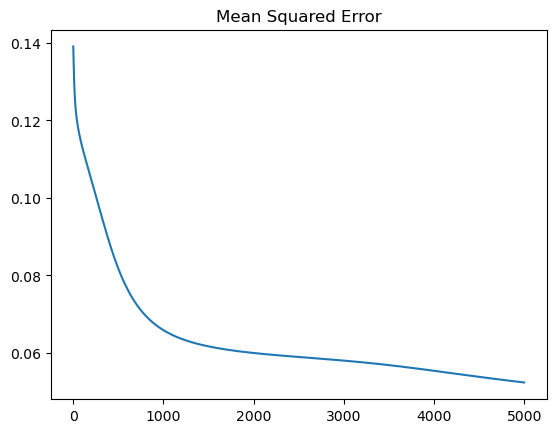

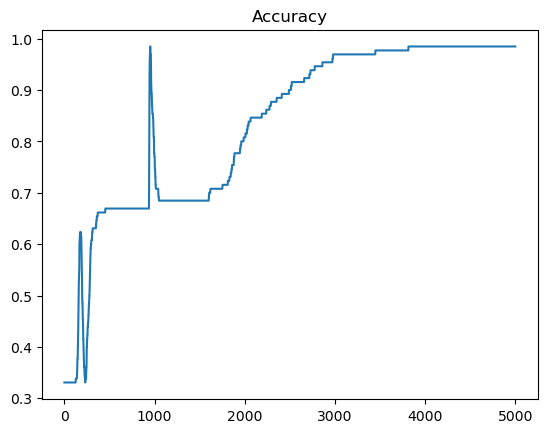

In [8]:
results.mse.plot(title="Mean Squared Error")
plt.show()
results.accuracy.plot(title="Accuracy")
plt.show()

In [9]:
# Test the model
Z1 = np.dot(X_test, W1)
A1 = sigmoid(Z1)
Z2 = np.dot(A1, W2)
A2 = sigmoid(Z2)
test_acc = accuracy(np.eye(output_size)[y_test], A2)
print("Test accuracy: {}".format(test_acc))


Test accuracy: 0.95
